# Compare old code modules to find unique functionality set - coloring
    * graphic_utility.py
    * numcolorpy.py

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

separable = 0.7958 + 0.1893j 
iconic = 0.7757 + 0.1234j
spirals = 0.7513 + 0.2551j
ropey = 0.81 + 0.2025j

def GastonJ(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    return Z**2 - p

In [2]:
help(gu)

Help on module graphic_utility:

NAME
    graphic_utility

DESCRIPTION
    graphic_utility.py
    Created on Thu Aug  4 14:12:17 2016
    
    @author: del
    lanier4@illinois.edu
    mradmstr514226508@gmail.com

CLASSES
    builtins.object
        hsv_object
    
    class hsv_object(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, Z0, Z, ET)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  get_image(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    ET_as_grayscale(ET)
        I = ET_as_grayscale(ET)
        Args:
            ET: rows x cols x 1 numerical (real) matrix
        Returns:
            I:  rows x cols x 3 image
    
    Z_ET_to_sh

In [3]:
help(ncp)

Help on module numcolorpy:

NAME
    numcolorpy

DESCRIPTION
    numcolorpy.py
    Created Saturday April 22 2017
    
    @author: del
    lanier4@illinois.edu
    mradmstr514226508@gmail.com
    
    import numcolorpy as ncp

FUNCTIONS
    etg_norm(Z0, Z, ET)
        Zd, Zr, ETn = etg_norm(Z0, Z, ET); Graphically usable matrices from escape time algorithm result
    
    flat_index(float_mat)
        convert the input matrix to integers from 0 to number of unique values.
        
        Args:
            float_mat: two dimensional matrix.
            
        Return:
            float_mat: re-enumerated so that the matrix values are all sequential ints.
            n_colors:  number of unique values in the input / output matrix
    
    graphic_norm(Z)
        rescale matrix z to distance (float) s.t.   
            0 <= z <= 1  (will include 0,1 if it has more than 1 value)
        
        Args:
            Z: is a real or complex two dimensional matrix
        
        Returns:
 

In [4]:
# powers of 8 (aka 2^3)
base_scale = 32
one_mb = 1e6
for e_x in range(12):
    px_hw = base_scale*8**e_x
    print('%i'%(px_hw))
    low_res_image_size = 3*px_hw**2
    print('\t3 byte color\tMb %i'%(round(low_res_image_size/one_mb)))
    hi_res_image_size = 8*low_res_image_size
    print('\thigh-res color\tMb %i\n'%(round(hi_res_image_size/one_mb)))

32
	3 byte color	Mb 0
	high-res color	Mb 0

256
	3 byte color	Mb 0
	high-res color	Mb 2

2048
	3 byte color	Mb 13
	high-res color	Mb 101

16384
	3 byte color	Mb 805
	high-res color	Mb 6442

131072
	3 byte color	Mb 51540
	high-res color	Mb 412317

1048576
	3 byte color	Mb 3298535
	high-res color	Mb 26388279

8388608
	3 byte color	Mb 211106233
	high-res color	Mb 1688849860

67108864
	3 byte color	Mb 13510798882
	high-res color	Mb 108086391057

536870912
	3 byte color	Mb 864691128455
	high-res color	Mb 6917529027641

4294967296
	3 byte color	Mb 55340232221129
	high-res color	Mb 442721857769029

34359738368
	3 byte color	Mb 3541774862152234
	high-res color	Mb 28334198897217872

274877906944
	3 byte color	Mb 226673591177742976
	high-res color	Mb 1813388729421943808



23.663954257965088 	 total time
converstion time =	 1.4192049503326416
coloring time:	 8.105089902877808


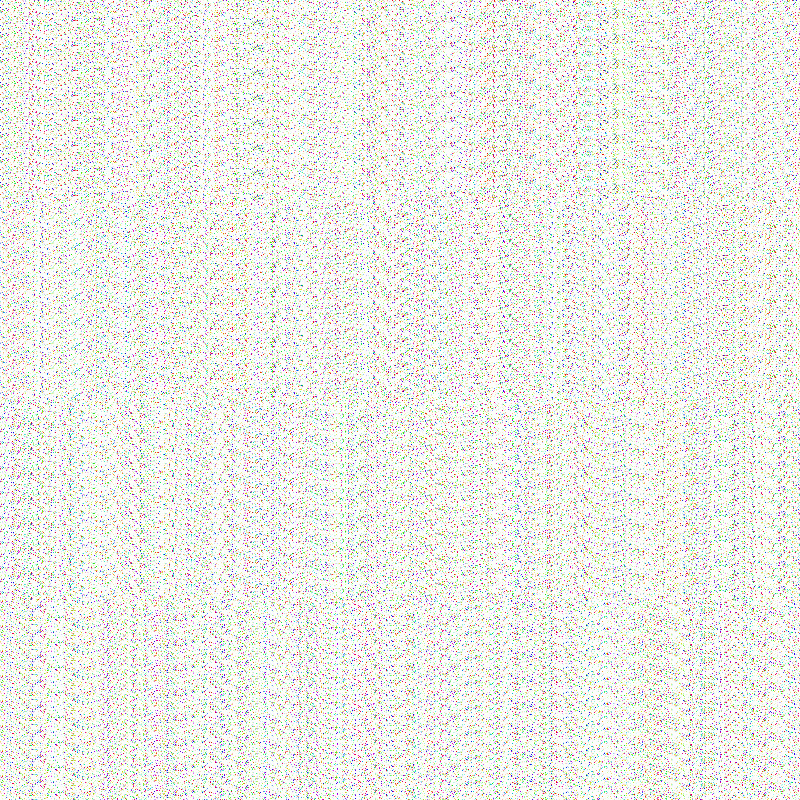

In [5]:
#                           -- define parameters iterate the above equation  --  "iconic" parameter p
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 4
par_set['zoom'] = 3/4

par_set['it_max'] = 128
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

par_set['RANDOM_PLANE'] = True

list_tuple = [(GastonJ, (iconic))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

H = ncp.range_norm(Zd - Zr, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn, lo=0.0, hi=1.0)
V = ncp.range_norm(1 - ETn, lo=0.9, hi=1.0)

t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)